# 1. Project Overview
## Climate Change Belief Analysis

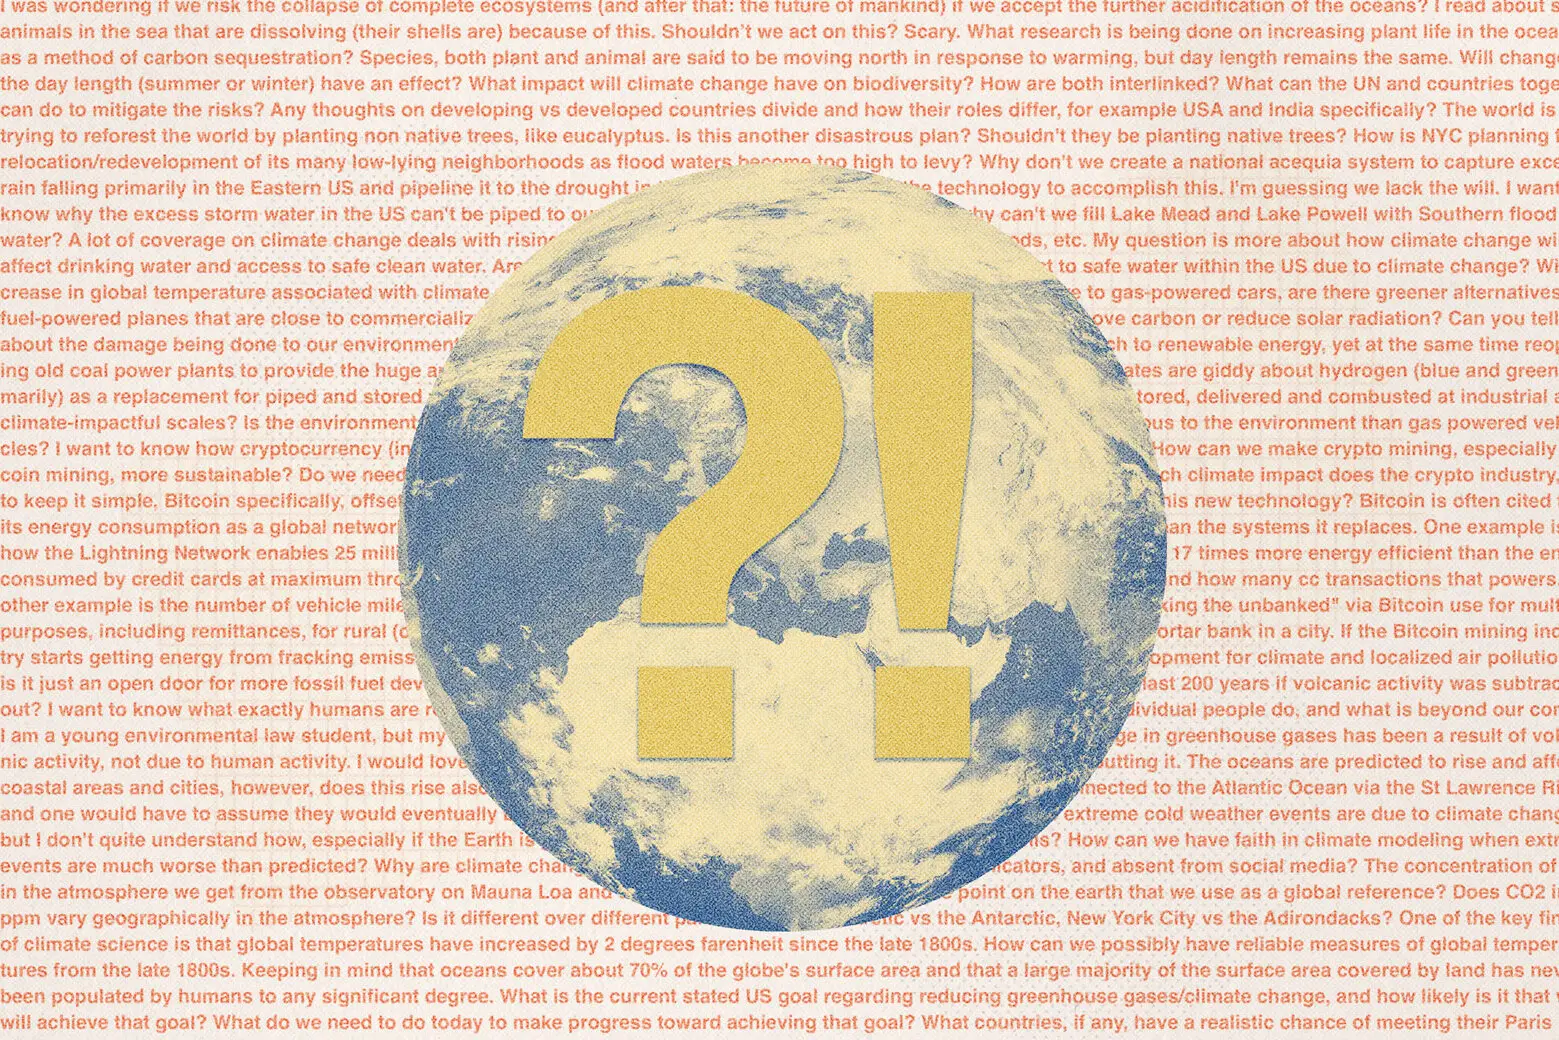

<center>image source: (The New York Times, 2022)

# 1. Introduction:
According to a baron survey, 19,000 customers from 28 countries were given a poll to determine how individual shopping decisions are changing. Nearly 70% of consumers in the United States and Canada believe that a company or brand's sustainability or eco-friendliness is important. More than one-third (40%) of global respondents said they are purpose-driven consumers who choose brands based on how well they align with their personal beliefs (Dinara Bekmagambetova, 2020).

Many companies are built around lessening one’s environmental impact or carbon footprint. They offer products and services that are environmentally friendly and sustainable, in line with their values and ideals. They would like to determine how people perceive climate change and whether or not they believe it is a real threat. This would add to their market research efforts in gauging how their product/service may be received.

Our goal within this notebook is creating a Machine Learning model that is able to classify whether or not a person believes in climate change, based on their novel tweet data.

Providing an accurate and robust solution to this task gives companies access to a broad base of consumer sentiment, spanning multiple demographic and geographic categories - thus increasing their insights and informing future marketing strategies.

<a id="1.1"></a>
## **1.1 Problem Statement:**
Create a Machine Learning model based on new tweet data to classify whether or not a person believes in climate change.
You can find the project overview [here](https://www.kaggle.com/competitions/edsa-climate-change-belief-analysis-2022/data).

# 2. Imports

## 2.1 Import python libraries

In [54]:
# Loading Data
import pandas as pd
import numpy as np
import nltk
import string
import re
import time

# Explore Data Analysis
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
from matplotlib.pyplot import rcParams
from sklearn.feature_extraction.text import CountVectorizer

# Data Preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.utils import resample
from nltk.tokenize import word_tokenize, TreebankWordTokenizer
from nltk.stem import WordNetLemmatizer

## 2.2 Importing the dataset

- Train.csv: contains all the variables required to train the model
- Test.csv : contains all the variables required to test the model

In [12]:
# Importing the train & test data sets
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test_with_no_labels.csv')

### 2.2.1 Getting familiar with the dataset

In [19]:
# View the first 5 rows of the train data
train_df.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [20]:
# View the first 5 rows of the test data
test_df.head()

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


In [22]:
train_df.sentiment.value_counts()

 1    8530
 2    3640
 0    2353
-1    1296
Name: sentiment, dtype: int64

### 2.2.2 Observation of the dataset's structure

In [31]:
print(train_df.info()) #checking the data type of each column in the train data
print('\n')
print(test_df.info()) #checking the data type of each column in the test data


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10546 entries, 0 to 10545
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  10546 non-null  object
 1   tweetid  10546 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 164.9+ KB
None


The two most common data types observed are integers and object types.

In [84]:
# Display the summary of the datasets
print(f'The train dataset has {train_df.shape[0]} rows/entries and {train_df.shape[1]} columns ({train_df.columns[0]}, {train_df.columns[1]}, and {train_df.columns[2]})')
print(f'The test dataset has {test_df.shape[0]} rows/entries and {test_df.shape[1]} columns ({test_df.columns[0]} and {test_df.columns[1]})')

The train dataset has 15819 rows/entries and 3 columns (sentiment, message, and tweetid)
The test dataset has 10546 rows/entries and 2 columns (message and tweetid)


In [85]:
# Display of the data statistics using the transpose method
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
sentiment,15819.0,0.917504,0.836537,-1.0,1.0,1.0,1.0,2.0
tweetid,15819.0,501719.433656,289045.983132,6.0,253207.5,502291.0,753769.0,999888.0


# 3 Exploratory Data Analysis (EDA)

In this section, we will conduct a thorough examination of all the variables in the DataFrame.

In [101]:
# Getting the details of some of the messages in the first 3 messages
for i in range(0,3):
    
    print('message number ',i)
    print('===================================================================================')
    print(train_df.message[i])
    print(" ")

message number  0
PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via @mashable
 
message number  1
It's not like we lack evidence of anthropogenic global warming
 
message number  2
RT @RawStory: Researchers say we have three years to act on climate change before it’s too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…
 


## 3.1 Check for missing values

Checking for missing values and empty spaces in machine learning is a good practice. If missing values are discovered, they are usually filled with Zero, Mean, Median, or Mode. Alternatively, the columns/rows are deleted.

In [94]:
# Check for train data missing values 
train_df.isnull().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

In [95]:
# Check for train data missing values 
test_df.isnull().sum()

message    0
tweetid    0
dtype: int64

### 3.1.1 Blank value check

There are no Nan values, however empty strings (blank values) can exist, therefore we'll check using the pandas' isspace() method.

In [97]:
# Blank tweet check
print(f"There are {train_df[train_df['message'].map(lambda x: x.isspace())].count().sum()} blank values in the 'message' column of the train set")
print(f"There are {test_df[test_df['message'].map(lambda x: x.isspace())].count().sum()} blank values in the 'message' column of the test set")

There are 0 blank values in the 'message' column of the train set
There are 0 blank values in the 'message' column of the test set


### 3.1.2 Duplicate  check

Checking for duplicates is a good example of the value of context:  On Twitter, retweets are usually referred to as duplicates. A simple and easy way to downsample without losing data is to remove duplicates from the classes with most entries

In [99]:
print(f"{train_df[train_df.duplicated(subset='message')]['message'].count()} values, or ~{round(train_df[train_df.duplicated(subset='message')]['message'].count()/len(train_df)*100, 2)}%  of the train set are duplicated (i.e. retweets)")
print(f"{test_df[test_df.duplicated(subset='message')]['message'].count()} values, or ~{round(test_df[test_df.duplicated(subset='message')]['message'].count()/len(test_df)*100, 2)}%  of the test set are duplicated (i.e. retweets)")

1590 values, or ~10.05%  of the train set are duplicated (i.e. retweets)
971 values, or ~9.21%  of the test set are duplicated (i.e. retweets)


## 3.2 The distribution of the tweets length in the data

Understanding climate change sentiments on Twitter reveals that there are various perspectives on climate change, as well as the classes associated with individual perspectives.

Text(0.5, 1.0, 'Class Distributions')

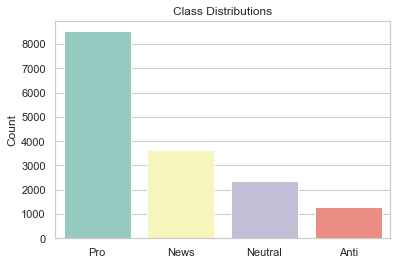

In [106]:
# Create class distribution dataframe
class_dist = pd.DataFrame(list(train_df['sentiment'].value_counts()),
                          index=['Pro', 'News', 'Neutral', 'Anti'],
                          columns=['Count'])

# Plot class distribution
sns.set(style="whitegrid")
sns.barplot(x=class_dist.index, y=class_dist.Count, 
           palette="Set3")
plt.title('Class Distributions')

In [112]:
#extract the value counts per sentiment class
a = train_df.sentiment.value_counts()
#calculate the percentage of each sentiment class
b = 100*train_df.sentiment.value_counts()/len(train_df.sentiment)
b = round(b,2)
data = pd.concat([a,b],axis =1,)
data.columns = ['Value Count', 'Percentage']
data

,Value Count,Percentage
1,8530,53.92
2,3640,23.01
0,2353,14.87
-1,1296,8.19


In [108]:
pro_words = ' '.join([text for text in train_df['message'][train_df['sentiment']==1]])
pro_wordcloud = WordCloud(width=400, 
                          height=250, 
                          random_state=73, 
                          max_font_size=110, 
                          background_color='white',
                          colormap="Greens").generate(pro_words)

neutral_words = ' '.join([text for text in train_df['message'][train_df['sentiment']==0]])
neutral_wordcloud = WordCloud(random_state=73, 
                          max_font_size=110, 
                          background_color='white',
                          colormap="Purples").generate(neutral_words)

anti_words = ' '.join([text for text in train_df['message'][train_df['sentiment']==0]])
anti_wordcloud = WordCloud(random_state=73, 
                          max_font_size=110, 
                          background_color='white',
                          colormap="Reds").generate(anti_words)

news_words = ' '.join([text for text in train_df['message'][train_df['sentiment']==0]])
news_wordcloud = WordCloud(random_state=73, 
                          max_font_size=110, 
                          background_color='white',
                          colormap="Blues").generate(news_words)

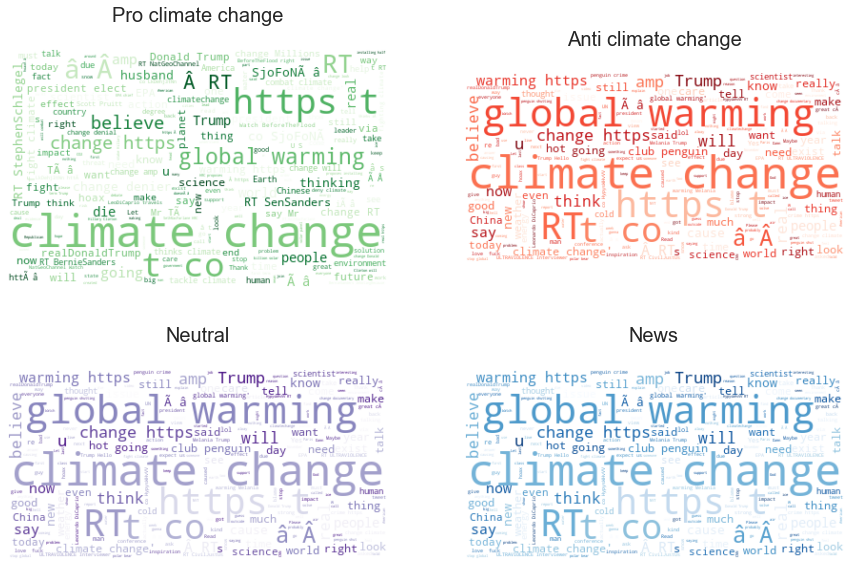

In [111]:
fig, ax = plt.subplots(2,2, figsize=(15,10))
ax[0,0].imshow(pro_wordcloud, interpolation="bilinear")
ax[0,1].imshow(anti_wordcloud, interpolation="bilinear")
ax[1,0].imshow(neutral_wordcloud, interpolation="bilinear")
ax[1,1].imshow(news_wordcloud, interpolation="bilinear")

# Remove the ticks on the x and y axes
for axs in fig.axes:
    plt.sca(axs)
    plt.axis('off')

ax[0,0].set_title('Pro climate change\n', fontsize=20)
ax[0,1].set_title('Anti climate change\n', fontsize=20)
ax[1,0].set_title('Neutral\n', fontsize=20)
ax[1,1].set_title('News\n', fontsize=20)
#plt.tight_layout()
plt.show()

# References

1. Dinara Bekmagambetova (2020) Two-Thirds of North Americans Prefer Eco-Friendly Brands, Study Finds | Barron’s. Available at: https://www.barrons.com/articles/two-thirds-of-north-americans-prefer-eco-friendly-brands-study-finds-51578661728?mod=hp_minor_pos16 (Accessed: 10 June 2022).
2. The New York Times (2022) Climate Change: Your Questions About Causes and Effects, Answered - The New York Times. Available at: https://www.nytimes.com/explain/2022/04/22/climate/climate-change-causes-effects (Accessed: 10 June 2022).